#Imports

In [1]:
import os
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

random.seed(42)
np.random.seed(42)

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Combined_dataset.csv')

#EDA

In [3]:
# Display basic information
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

                                               tweet  crisis
0  intern tattoo wisconsin ohio nc pa florida col...       0
1  jack ward fun thursday csindependent funbrief ...       0
2  welcome new studentathlete reagan biechler col...       0
3  denver post colorado governor sign bill create...       0
4  pretty sure m go live manitou spring co someda...       0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246987 entries, 0 to 246986
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   tweet   246987 non-null  object
 1   crisis  246987 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.8+ MB
None
              crisis
count  246987.000000
mean        0.532198
std         0.498963
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
tweet     0
crisis    0
dtype: int64


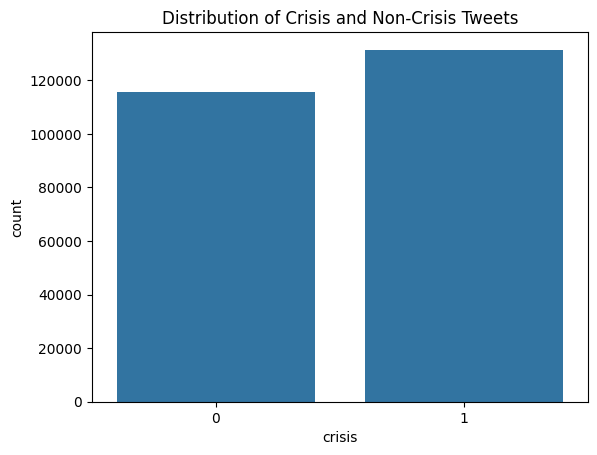

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the countplot on the smaller dataset
sns.countplot(x='crisis', data=df)
plt.title("Distribution of Crisis and Non-Crisis Tweets")
plt.show()


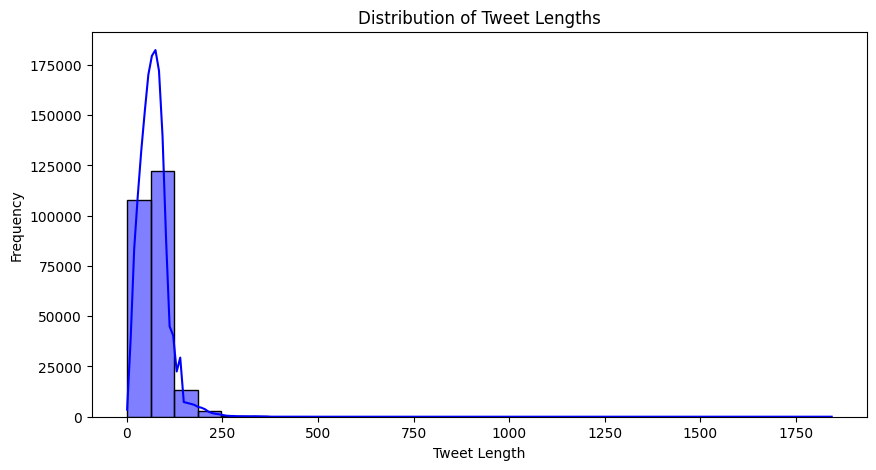

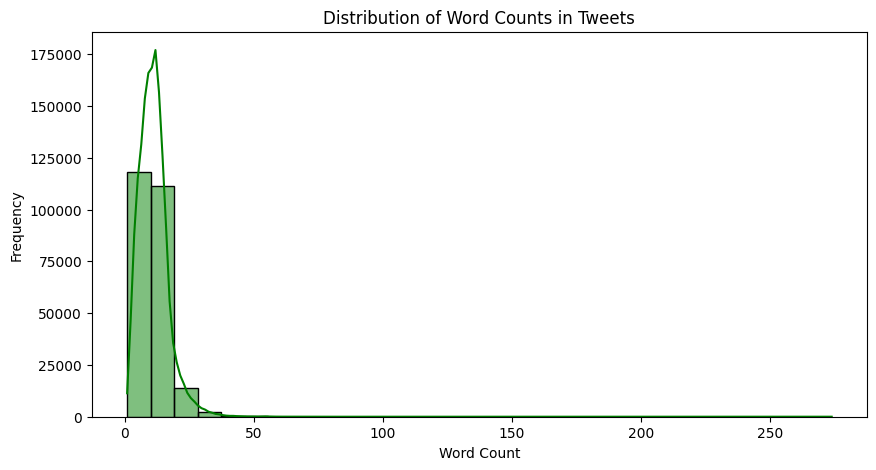

In [5]:
# Create a new column for tweet length
df['tweet_length'] = df['tweet'].apply(len)
df['word_count'] = df['tweet'].apply(lambda x: len(x.split()))

# Plotting tweet lengths
plt.figure(figsize=(10, 5))
sns.histplot(df['tweet_length'], kde=True, color='blue', bins=30)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

# Plotting word count
plt.figure(figsize=(10, 5))
sns.histplot(df['word_count'], kde=True, color='green', bins=30)
plt.title('Distribution of Word Counts in Tweets')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


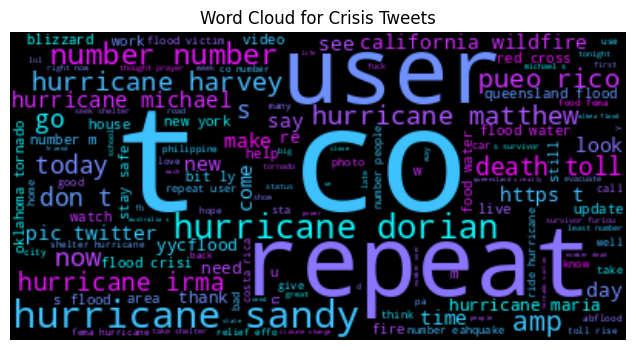

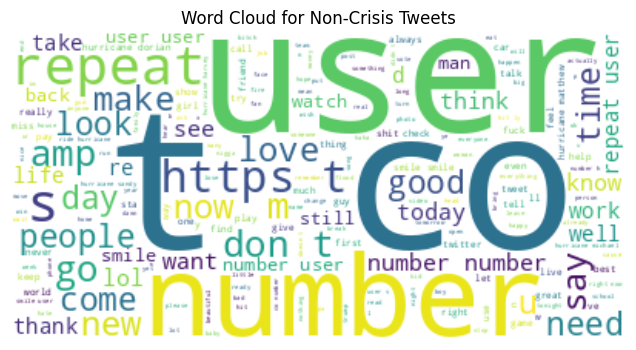

In [6]:
from wordcloud import WordCloud

# Combine all tweets for each category
crisis_text = " ".join(df[df['crisis'] == 1]['tweet'].astype(str).tolist())
non_crisis_text = " ".join(df[df['crisis'] == 0]['tweet'].astype(str).tolist())

# Create word cloud for crisis tweets
plt.figure(figsize=(9, 4))
wc_crisis = WordCloud(background_color='black', max_words=200, colormap='cool').generate(crisis_text)
plt.imshow(wc_crisis, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Crisis Tweets")
plt.show()

# Create word cloud for non-crisis tweets
plt.figure(figsize=(9, 4))
wc_non_crisis = WordCloud(background_color='white', max_words=200, colormap='viridis').generate(non_crisis_text)
plt.imshow(wc_non_crisis, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Non-Crisis Tweets")
plt.show()


#Feature Extraction

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

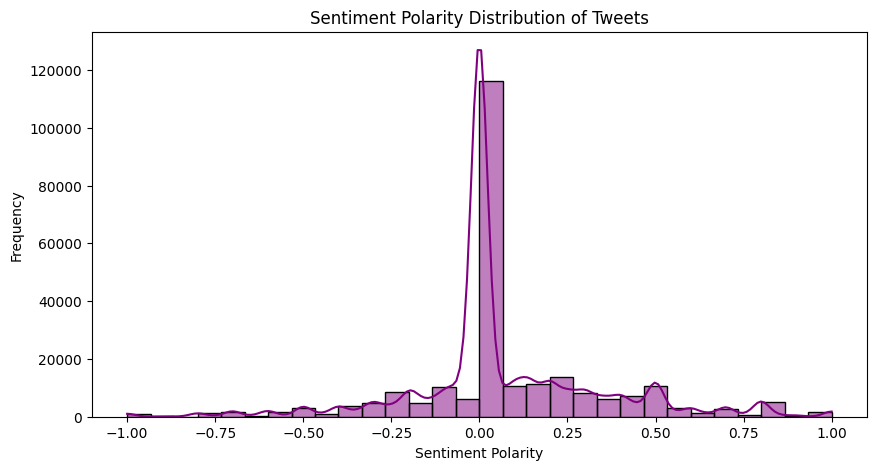

<ipython-input-6-b2c4dd00a39a>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='crisis', y='sentiment', data=df, palette='coolwarm')


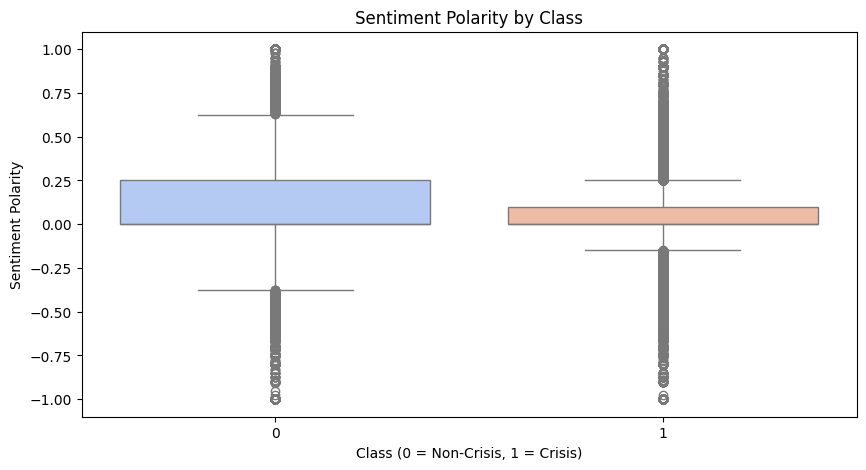

In [6]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment function
df['sentiment'] = df['tweet'].apply(get_sentiment)

# Plot sentiment distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['sentiment'], kde=True, bins=30, color='purple')
plt.title('Sentiment Polarity Distribution of Tweets')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Compare sentiment polarity for crisis vs. non-crisis tweets
plt.figure(figsize=(10, 5))
sns.boxplot(x='crisis', y='sentiment', data=df, palette='coolwarm')
plt.title('Sentiment Polarity by Class')
plt.xlabel('Class (0 = Non-Crisis, 1 = Crisis)')
plt.ylabel('Sentiment Polarity')
plt.show()


<ipython-input-9-829d15a54d62>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='ngram', data=ngram_counts, palette='viridis')


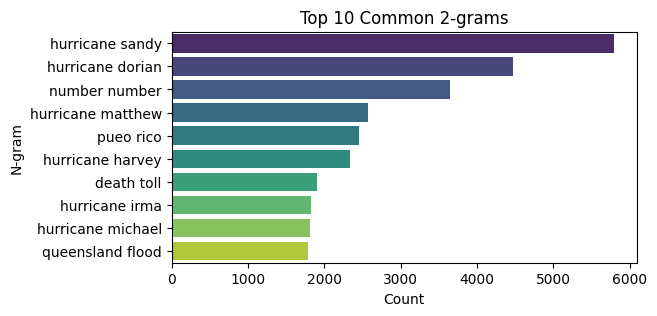

<ipython-input-9-829d15a54d62>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='ngram', data=ngram_counts, palette='viridis')


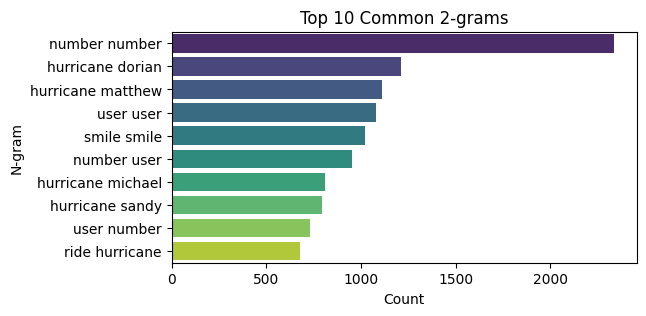

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

# Define a function to plot the most common n-grams
def plot_ngrams(text_data, ngram_range=(2, 2), top_n=10):
    # Vectorize the text data using CountVectorizer
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(text_data)
    ngrams = vectorizer.get_feature_names_out()
    counts = X.sum(axis=0).A1
    ngram_counts = pd.DataFrame({'ngram': ngrams, 'count': counts})
    ngram_counts = ngram_counts.sort_values(by='count', ascending=False).head(top_n)

    # Plot the top n-grams
    plt.figure(figsize=(6, 3))
    sns.barplot(x='count', y='ngram', data=ngram_counts, palette='viridis')
    plt.title(f'Top {top_n} Common {ngram_range[1]}-grams')
    plt.xlabel('Count')
    plt.ylabel('N-gram')
    plt.show()

# Plot top bigrams for crisis tweets
plot_ngrams(df[df['crisis'] == 1]['tweet'], ngram_range=(2, 2), top_n=10)

# Plot top bigrams for non-crisis tweets
plot_ngrams(df[df['crisis'] == 0]['tweet'], ngram_range=(2, 2), top_n=10)


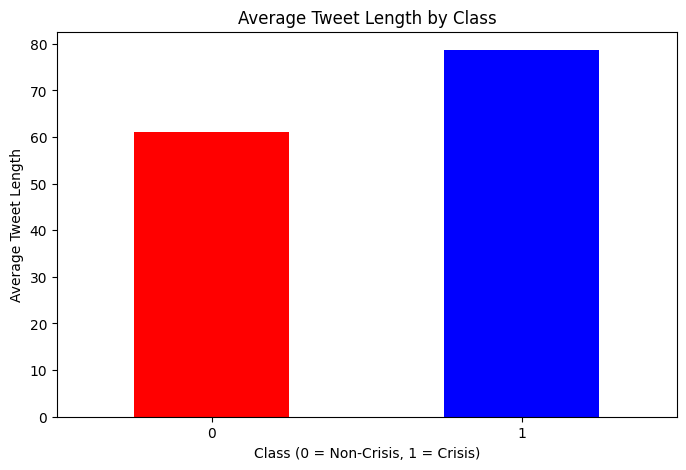

In [7]:
# Calculate tweet length
df['tweet_length'] = df['tweet'].apply(len)

# Calculate average tweet length for each class (Crisis and Non-Crisis)
avg_length_by_class = df.groupby('crisis')['tweet_length'].mean()

# Plotting the average tweet length for both classes
plt.figure(figsize=(8, 5))
avg_length_by_class.plot(kind='bar', color=['red', 'blue'])
plt.title('Average Tweet Length by Class')
plt.xlabel('Class (0 = Non-Crisis, 1 = Crisis)')
plt.ylabel('Average Tweet Length')
plt.xticks(rotation=0)
plt.show()


In [11]:
print(df.columns)

Index(['tweet', 'crisis', 'tweet_length', 'word_count', 'sentiment'], dtype='object')


In [12]:
import pandas as pd

# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values
print("Missing Values in Each Column:", missing_values)
print()

# Display total missing values in the dataset
total_missing = missing_values.sum()
print(f"\nTotal Missing Values in the Dataset: {total_missing}")


Missing Values in Each Column: tweet           0
crisis          0
tweet_length    0
word_count      0
sentiment       0
dtype: int64


Total Missing Values in the Dataset: 0


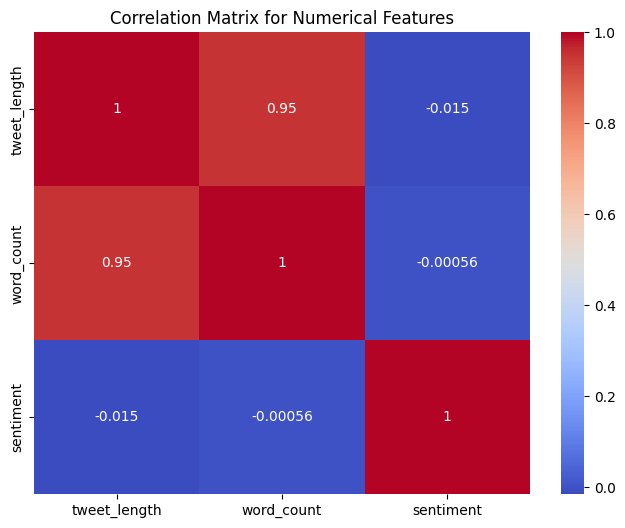

In [13]:
# Compute correlation matrix
correlation_matrix = df[['tweet_length', 'word_count', 'sentiment']].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()


In [8]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from multiprocessing import cpu_count, Pool

# Download stopwords and lemmatizer data if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Compile regular expressions once for optimization
mention_pattern = re.compile(r'@\w+')
hashtag_pattern = re.compile(r'#')
url_pattern = re.compile(r"http\S+|www\S+|https\S+")
emoji_pattern = re.compile(r'[\U00010000-\U0010FFFF]')
special_char_pattern = re.compile(r'[^A-Za-z\s]')

# Define preprocessing function
def preprocess_tweet_optimized(tweet):
    # Convert to lowercase
    tweet = tweet.lower()
    # Remove mentions
    tweet = mention_pattern.sub('', tweet)
    # Remove "#" symbol but retain the text
    tweet = hashtag_pattern.sub('', tweet)
    # Remove URLs
    tweet = url_pattern.sub('', tweet)
    # Remove emojis
    tweet = emoji_pattern.sub('', tweet)
    # Remove special characters, numbers, and punctuation (except words)
    tweet = special_char_pattern.sub('', tweet)
    # Tokenize and remove stopwords
    words = [word for word in tweet.split() if word not in stop_words]
    # Lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Parallelize processing using multiprocessing
def parallel_apply(df, func, cores=cpu_count()):
    """Apply a function to a DataFrame column in parallel."""
    with Pool(cores) as pool:
        result = pool.map(func, df['tweet'])
    return result

# Apply the preprocessing function in parallel
df['cleaned_tweet'] = parallel_apply(df, preprocess_tweet_optimized)

# Check the first few cleaned tweets
print(df[['tweet', 'cleaned_tweet']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                               tweet  \
0  intern tattoo wisconsin ohio nc pa florida col...   
1  jack ward fun thursday csindependent funbrief ...   
2  welcome new studentathlete reagan biechler col...   
3  denver post colorado governor sign bill create...   
4  pretty sure m go live manitou spring co someda...   

                                       cleaned_tweet  
0  intern tattoo wisconsin ohio nc pa florida col...  
1  jack ward fun thursday csindependent funbrief ...  
2  welcome new studentathlete reagan biechler col...  
3  denver post colorado governor sign bill create...  
4  pretty sure go live manitou spring co someday ...  


In [15]:
print(df.tail())

                                                    tweet  crisis  \
246982  Media should have warned us well in advance. T...       0   
246983  i feel directly attacked 💀 i consider moonbin ...       0   
246984  i feel directly attacked 💀 i consider moonbin ...       0   
246985  ok who remember "outcast" nd the "dora" au?? T...       0   
246986     Jake Corway wrecked while running 14th at IRP.       1   

        tweet_length  word_count  sentiment  \
246982            92          17   0.200000   
246983           115          22  -0.233333   
246984           139          23  -0.233333   
246985           105          17   0.500000   
246986            46           8   0.000000   

                                            cleaned_tweet  
246982  medium warned u well advance wrecked whole nig...  
246983  feel directly attacked consider moonbin amp ji...  
246984  feel directly attacked consider moonbin amp ji...  
246985  ok remember outcast nd dora au au wrecked nerv...  
24

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = tfidf_vectorizer.fit_transform(df['cleaned_tweet'])

# Target variable
y = df['crisis']


#Feature Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler
# Scale numerical features (tweet_length, word_count, sentiment) separately
scaler = MinMaxScaler()
numerical_features = df[['tweet_length', 'word_count', 'sentiment']]

scaled_numerical_features = scaler.fit_transform(numerical_features)

# Print Shape Of Scaled numerical features
print("Shape of Scaled numerical features:", scaled_numerical_features.shape)

print("Scaled Numerical Features:", numerical_features.shape)



Shape of Scaled numerical features: (246987, 3)
Scaled Numerical Features: (246987, 3)


#Model Training

## Grid Search

In [9]:
print(df.columns)

Index(['tweet', 'crisis', 'tweet_length', 'word_count', 'sentiment',
       'cleaned_tweet'],
      dtype='object')


Random Forest Accuracy: 0.659135997408802
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.57      0.61     23188
           1       0.66      0.73      0.70     26210

    accuracy                           0.66     49398
   macro avg       0.66      0.65      0.65     49398
weighted avg       0.66      0.66      0.66     49398



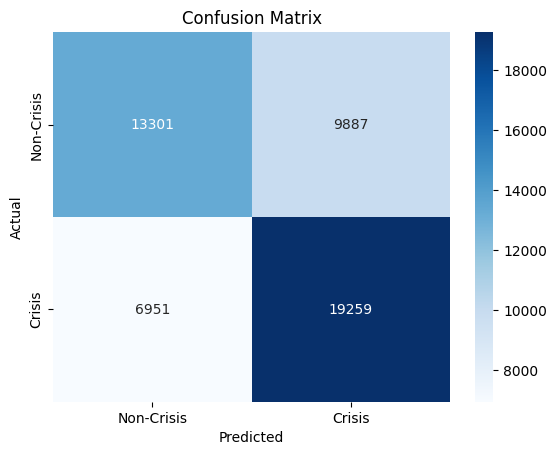

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming you already have your DataFrame `tweets_data`

# Handle any missing values in the necessary columns
df = df.dropna(subset=['tweet_length', 'word_count', 'sentiment'])

# Features: tweet_length, word_count, sentiment
X = df[['tweet_length', 'word_count', 'sentiment']]  # Non-textual features
y = df['crisis']  # Target: crisis (1 for crisis, 0 for non-crisis)df
# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler to normalize the features (especially helpful for Random Forest)
scaler = StandardScaler()

# Fit and transform the training data, transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Crisis', 'Crisis'], yticklabels=['Non-Crisis', 'Crisis'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [18]:
from imblearn.under_sampling import RandomUnderSampler

# Check the distribution of the target variable
print(f"Class distribution before undersampling: {y.value_counts()}")

# Initialize the RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1, random_state=42)

# Apply undersampling
X, y = rus.fit_resample(X, y)

# Check the distribution of the target variable after undersampling
print(f"Class distribution after undersampling: {y.value_counts()}")

Class distribution before undersampling: crisis
1    131446
0    115541
Name: count, dtype: int64
Class distribution after undersampling: crisis
0    115541
1    115541
Name: count, dtype: int64


In [19]:
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Crisis', 'Crisis'], yticklabels=['Non-Crisis', 'Crisis'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

In [20]:
from sklearn.model_selection import train_test_split

# Sample 1%(2500 samples) of the training data for Grid Search
X_train_sample, _, y_train_sample, _ = train_test_split(X, y, test_size=0.99, random_state=42)

# Split your dataset into training and testing sets using stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
print(X_train.shape)

(184865, 5000)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Logistic Regression parameters: {'C': 10, 'solver': 'liblinear'}
Logistic Regression Accuracy: 0.9107038535603782
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91     23109
           1       0.91      0.91      0.91     23108

    accuracy                           0.91     46217
   macro avg       0.91      0.91      0.91     46217
weighted avg       0.91      0.91      0.91     46217



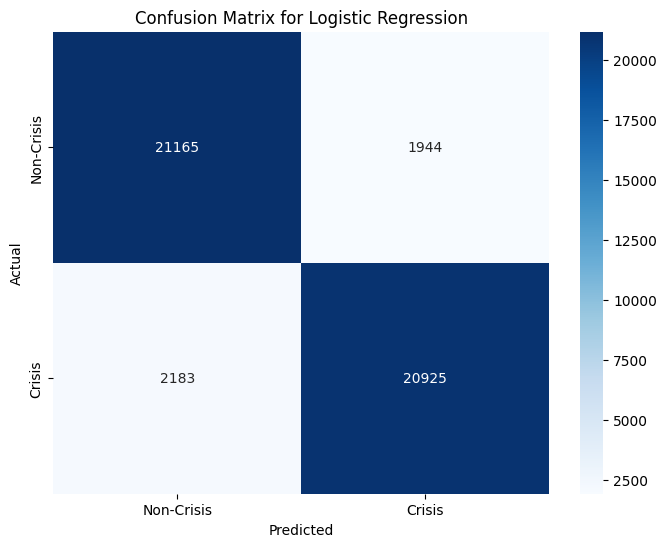

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

# Define parameter grid for hyperparameter tuning
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
}

# Perform Grid Search for hyperparameter tuning
grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=3, n_jobs=-1, verbose=1)
grid_search_lr.fit(X_train_sample, y_train_sample)

print("Best Logistic Regression parameters:", grid_search_lr.best_params_)

# Train final Logistic Regression model with the best parameters
final_lr_model = grid_search_lr.best_estimator_
final_lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = final_lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

# Compute confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Call the new confusion matrix plotting function
plot_confusion_matrix(cm_lr, 'Logistic Regression')


Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Decision Tree parameters: {'max_depth': None, 'min_samples_split': 5}
Decision Tree Accuracy: 0.908691606984443
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91     23109
           1       0.91      0.91      0.91     23108

    accuracy                           0.91     46217
   macro avg       0.91      0.91      0.91     46217
weighted avg       0.91      0.91      0.91     46217



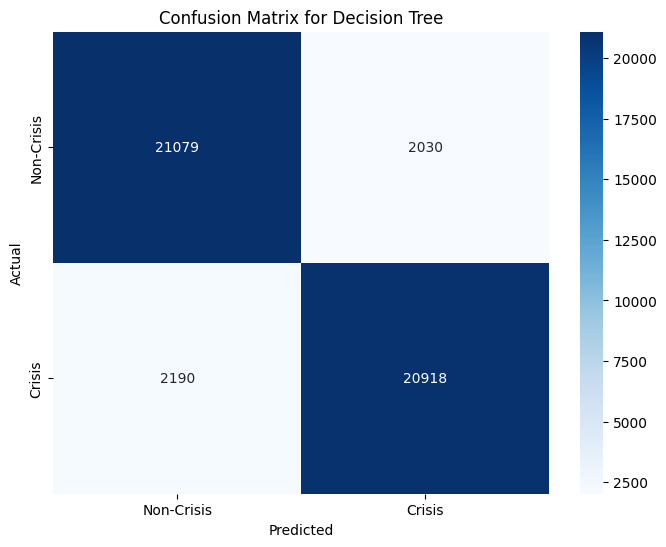

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier()

# Define parameter grid for hyperparameter tuning
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
}

# Perform Grid Search for hyperparameter tuning
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=3, n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train_sample, y_train_sample)

print("Best Decision Tree parameters:", grid_search_dt.best_params_)

# Train final Decision Tree model with the best parameters
final_dt_model = grid_search_dt.best_estimator_
final_dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = final_dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

# Compute confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plot_confusion_matrix(cm_dt, 'Decision Tree')


Fitting 3 folds for each of 45 candidates, totalling 135 fits
Best Random Forest parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Accuracy: 0.9224311400566891
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92     23109
           1       0.91      0.94      0.92     23108

    accuracy                           0.92     46217
   macro avg       0.92      0.92      0.92     46217
weighted avg       0.92      0.92      0.92     46217



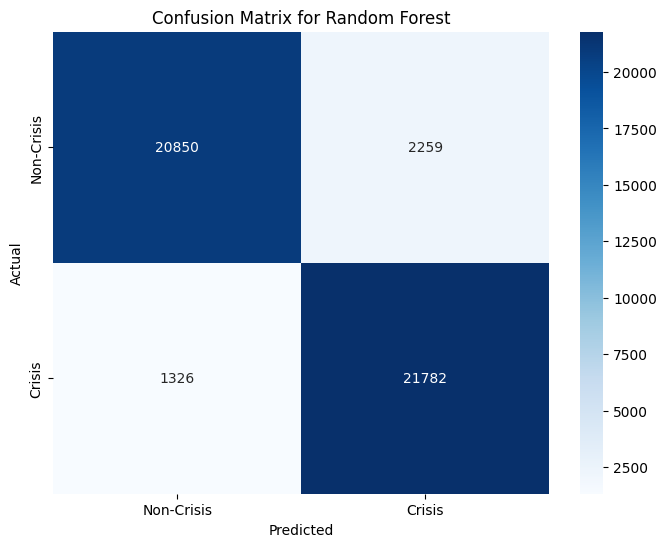

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier()

# Define parameter grid for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
}

# Perform Grid Search for hyperparameter tuning
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train_sample, y_train_sample)

print("Best Random Forest parameters:", grid_search_rf.best_params_)

# Train final Random Forest model with the best parameters
final_rf_model = grid_search_rf.best_estimator_
final_rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = final_rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(cm_rf, 'Random Forest')


In [ ]:
best_rf_params = {
    'max_depth': None,               # No limit to the depth of the tree
    'min_samples_split': 2,          # Minimum number of samples required to split an internal node
    'n_estimators': 100             # Number of trees in the forest
}

# Train final Random Forest model with the best parameters
final_rf_model = grid_search_rf.best_estimator_
final_rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = final_rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(cm_rf, 'Random Forest')

In [ ]:
import joblib

joblib.dump(final_rf_model, 'final_rf_model.joblib')
print("Random Forest model saved as 'final_rf_model.joblib'")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best XGBoost parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150}
XGBoost Accuracy: 0.911136594759504
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91     23109
           1       0.92      0.90      0.91     23108

    accuracy                           0.91     46217
   macro avg       0.91      0.91      0.91     46217
weighted avg       0.91      0.91      0.91     46217



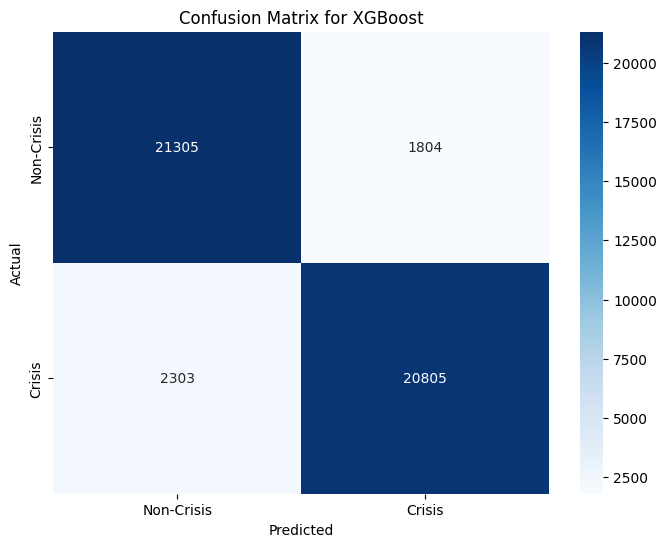

In [ ]:
from xgboost import XGBClassifier

# Initialize XGBoost model
xgb_model = XGBClassifier()

# Define parameter grid for hyperparameter tuning
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150],
}

# Perform Grid Search for hyperparameter tuning
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=3, n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train_sample, y_train_sample)

print("Best XGBoost parameters:", grid_search_xgb.best_params_)

# Train final XGBoost model with the best parameters
final_xgb_model = grid_search_xgb.best_estimator_
final_xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = final_xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Compute confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plot_confusion_matrix(cm_xgb, 'XGBoost')


Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best AdaBoost parameters: {'learning_rate': 1, 'n_estimators': 150}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.8876171105870134
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89     23109
           1       0.91      0.86      0.88     23108

    accuracy                           0.89     46217
   macro avg       0.89      0.89      0.89     46217
weighted avg       0.89      0.89      0.89     46217



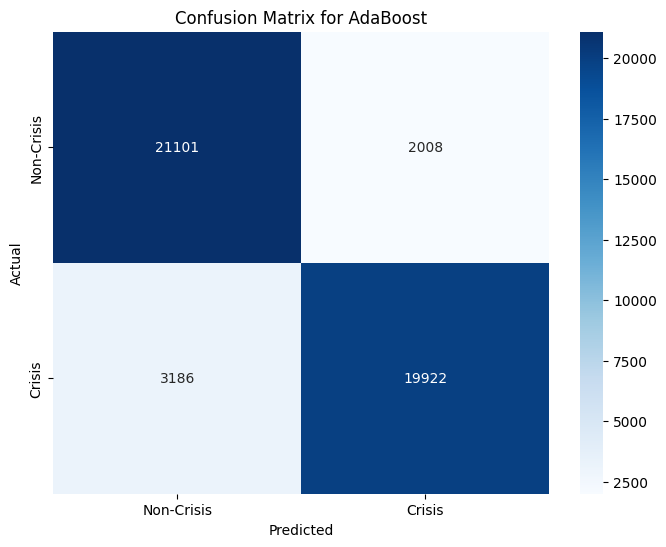

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost model
ada_model = AdaBoostClassifier()

# Define parameter grid for hyperparameter tuning
param_grid_ada = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2, 1],
}

# Perform Grid Search for hyperparameter tuning
grid_search_ada = GridSearchCV(ada_model, param_grid_ada, cv=3, n_jobs=-1, verbose=1)
grid_search_ada.fit(X_train_sample, y_train_sample)

print("Best AdaBoost parameters:", grid_search_ada.best_params_)

# Train final AdaBoost model with the best parameters
final_ada_model = grid_search_ada.best_estimator_
final_ada_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_ada = final_ada_model.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("AdaBoost Classification Report:\n", classification_report(y_test, y_pred_ada))

# Compute confusion matrix
cm_ada = confusion_matrix(y_test, y_pred_ada)
plot_confusion_matrix(cm_ada, 'AdaBoost')


Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best KNN parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
KNN Accuracy: 0.7883462795075405
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.95      0.82     23109
           1       0.93      0.63      0.75     23108

    accuracy                           0.79     46217
   macro avg       0.82      0.79      0.78     46217
weighted avg       0.82      0.79      0.78     46217



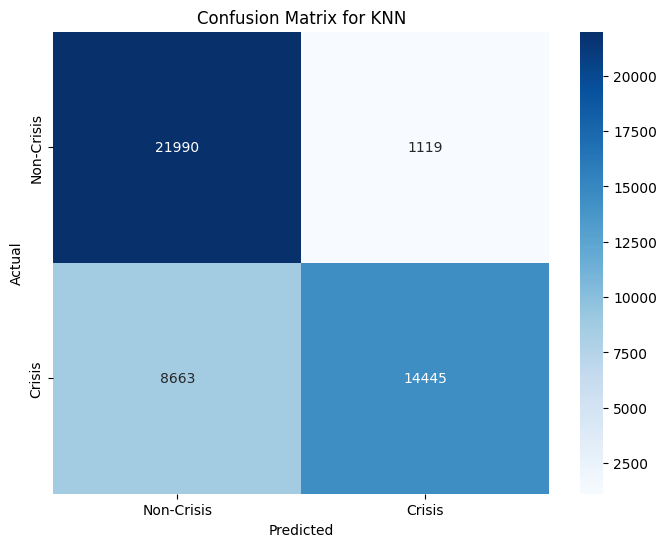

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model
knn_model = KNeighborsClassifier()

# Define parameter grid for hyperparameter tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}

# Perform Grid Search for hyperparameter tuning
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=3, n_jobs=-1, verbose=1)
grid_search_knn.fit(X_train_sample, y_train_sample)

print("Best KNN parameters:", grid_search_knn.best_params_)

# Train final KNN model with the best parameters
final_knn_model = grid_search_knn.best_estimator_
final_knn_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = final_knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

# Compute confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plot_confusion_matrix(cm_knn, 'KNN')


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best SVM parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
SVM Accuracy: 0.9126295518964883
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91     23109
           1       0.91      0.92      0.91     23108

    accuracy                           0.91     46217
   macro avg       0.91      0.91      0.91     46217
weighted avg       0.91      0.91      0.91     46217



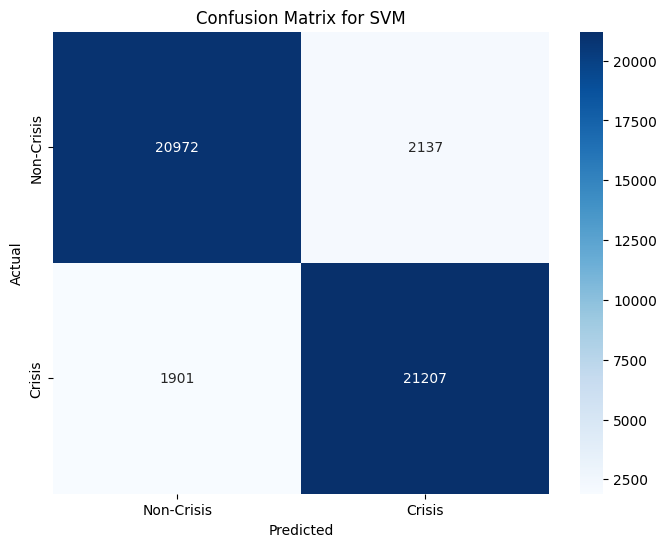

In [ ]:
from sklearn.svm import SVC

# Initialize SVM model
svm_model = SVC()

# Define parameter grid for hyperparameter tuning
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}

# Perform Grid Search for hyperparameter tuning
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=3, n_jobs=-1, verbose=1)
grid_search_svm.fit(X_train_sample, y_train_sample)

print("Best SVM parameters:", grid_search_svm.best_params_)

# Train final SVM model with the best parameters
final_svm_model = grid_search_svm.best_estimator_
final_svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = final_svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Compute confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(cm_svm, 'SVM')


In [25]:
from sklearn.neural_network import MLPClassifier

# Initialize MLP model
mlp_model = MLPClassifier(max_iter=100)

# Define parameter grid for hyperparameter tuning
param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (200,), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Perform Grid Search for hyperparameter tuning
grid_search_mlp = GridSearchCV(mlp_model, param_grid_mlp, cv=3, n_jobs=-1, verbose=1)
grid_search_mlp.fit(X_train_sample, y_train_sample)

print("Best MLP parameters:", grid_search_mlp.best_params_)

# Train final MLP model with the best parameters
final_mlp_model = grid_search_mlp.best_estimator_
final_mlp_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_mlp = final_mlp_model.predict(X_test)
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp))

# Compute confusion matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plot_confusion_matrix(cm_mlp, 'MLP')


Fitting 3 folds for each of 48 candidates, totalling 144 fits


KeyboardInterrupt: 

In [ ]:
best_params_mlp = {
    'hidden_layer_sizes': (100,),  # Single hidden layer with 100 neurons
    'activation': 'relu',          # ReLU activation function
    'solver': 'adam',              # Adam optimizer
    'alpha': 0.0001,               # Regularization parameter
    'learning_rate': 'adaptive',   # Adaptive learning rate
    'max_iter': 10,                # 10 iterations
    'early_stopping': True,        # Enable early stopping
    'validation_fraction': 0.1,    # Fraction of training data for validation
    'n_iter_no_change': 3          # Stop after 3 iterations with no improvement
}

In [ ]:
from sklearn.neural_network import MLPClassifier
# Initialize MLP model with best hyperparameters
mlp_model = MLPClassifier(**best_params_mlp)

# Train the model
mlp_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_mlp = mlp_model.predict(X_test)
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp))

# Compute confusion matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - MLP")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
!pip install tensorflow

In [31]:
print(X_train.shape)
print(y_train.shape)

(184865, 5000)
(184865,)


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

X_train_small = X_train[:50000]
y_train_small = y_train[:50000]
X_test_small = X_test[:20000]
y_test_small = y_test[:20000]

# Convert sparse matrix (if it's in sparse format) to dense matrix
X_train_dense = X_train_small.toarray()  # Convert sparse to dense
X_test_dense = X_test_small.toarray()    # Convert sparse to dense

# Reshape the input data into a 2D image format (50x100) for CNN
X_train_cnn = X_train_dense.reshape(-1, 50, 100, 1)  # Reshaping to (None, 50, 100, 1)
X_test_cnn = X_test_dense.reshape(-1, 50, 100, 1)

# Best CNN hyperparameters
best_params_cnn = {
    'filters': [32, 64],
    'kernel_size': (3, 3),
    'activation': 'relu',
    'pool_size': (2, 2),
    'optimizer': 'adam',
    'batch_size': 32,
    'epochs': 10
}

# Define the CNN model
cnn_model = Sequential([
    Conv2D(best_params_cnn['filters'][0], best_params_cnn['kernel_size'], activation=best_params_cnn['activation'], input_shape=(50, 100, 1)),
    MaxPooling2D(pool_size=best_params_cnn['pool_size']),
    Conv2D(best_params_cnn['filters'][1], best_params_cnn['kernel_size'], activation=best_params_cnn['activation']),
    MaxPooling2D(pool_size=best_params_cnn['pool_size']),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Assuming 10 classes for classification
])

# Compile the model
cnn_model.compile(optimizer=best_params_cnn['optimizer'], loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model with early stopping
history_cnn = cnn_model.fit(X_train_cnn, y_train_small, epochs=best_params_cnn['epochs'], batch_size=best_params_cnn['batch_size'],
                            validation_data=(X_test_cnn, y_test_small), callbacks=[early_stopping])

# Evaluate the model
cnn_loss, cnn_acc = cnn_model.evaluate(X_test_cnn, y_test_small)
print("CNN Accuracy:", cnn_acc)

# Predict and compute confusion matrix
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_cnn = tf.argmax(y_pred_cnn, axis=1)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_cnn = confusion_matrix(y_test, y_pred_cnn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cnn, annot=True, fmt="d", cmap="Blues", xticklabels=[f"Class {i}" for i in range(10)],
            yticklabels=[f"Class {i}" for i in range(10)])
plt.title("Confusion Matrix - CNN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 370s 236ms/step - accuracy: 0.7380 - loss: 0.5309 - val_accuracy: 0.8791 - val_loss: 0.3078
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 374s 231ms/step - accuracy: 0.8914 - loss: 0.2737 - val_accuracy: 0.8899 - val_loss: 0.2877
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 370s 223ms/step - accuracy: 0.9095 - loss: 0.2328 - val_accuracy: 0.8986 - val_loss: 0.2644
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 340s 217ms/step - accuracy: 0.9332 - loss: 0.1769 - val_accuracy: 0.8990 - val_loss: 0.2806
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 370s 210ms/step - accuracy: 0.9568 - loss: 0.1213 - val_accuracy: 0.8956 - val_loss: 0.3173
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 381s 209ms/step - accuracy: 0.9731 - loss: 0.0803 - val_accuracy: 0.8920 - val_loss: 0.3689


ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 20000
'y' sizes: 46217


625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.8903 - loss: 0.3832
CNN Accuracy: 0.8920000195503235
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step


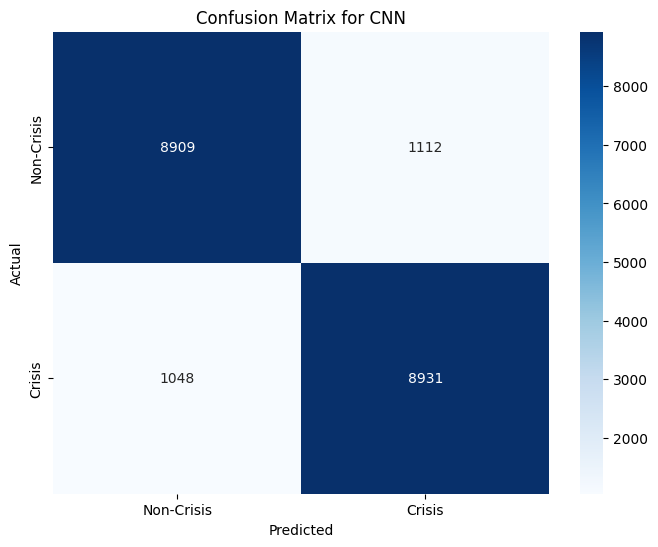

In [25]:
# Evaluate the model
cnn_loss, cnn_acc = cnn_model.evaluate(X_test_cnn, y_test_small)
print("CNN Accuracy:", cnn_acc)

# Predict and compute confusion matrix
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_cnn = tf.argmax(y_pred_cnn, axis=1)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_cnn = confusion_matrix(y_test_small, y_pred_cnn)
plot_confusion_matrix(cm_cnn, 'CNN')

##PCA

In [ ]:
from sklearn.decomposition import PCA

# Print the shape of X_train
print("Shape of X_train:", X_train.shape)

# Initialize PCA model, choose the number of components based on the explained variance
pca = PCA(n_components=2000)  # Retain 95% of the variance

# Fit and transform X_train using PCA
X_train_pca = pca.fit_transform(X_train)

X_test_pca = pca.transform(X_test)  # Apply the same transformation on the test set

X_train_sample_pca = pca.transform(X_train_sample)


# Print the shape of the transformed X_train
print("Shape of X_train after PCA:", X_train_pca.shape)


Shape of X_train: (184865, 5000)
Shape of X_train after PCA: (184865, 2000)


In [ ]:
X_train_sample_pca = pca.transform(X_train_sample)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Logistic Regression parameters: {'C': 10, 'solver': 'saga'}
Logistic Regression Accuracy: 0.9015081030789537
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90     23109
           1       0.91      0.89      0.90     23108

    accuracy                           0.90     46217
   macro avg       0.90      0.90      0.90     46217
weighted avg       0.90      0.90      0.90     46217



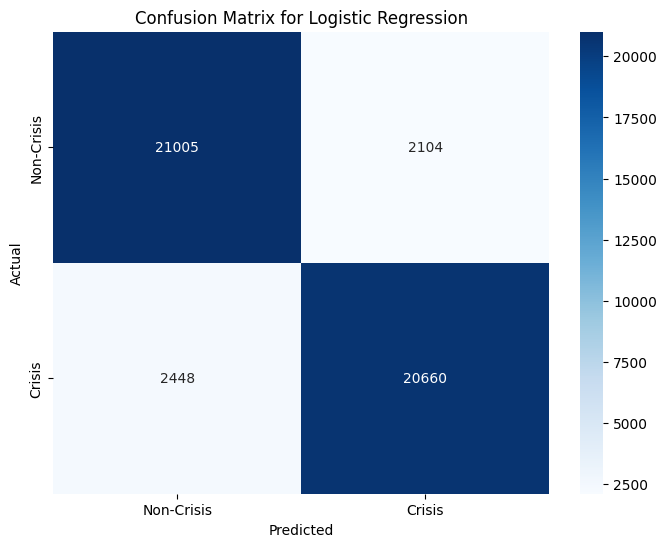

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

# Define parameter grid for hyperparameter tuning
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
}

# Perform Grid Search for hyperparameter tuning
grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=3, n_jobs=-1, verbose=1)
grid_search_lr.fit(X_train_sample_pca, y_train_sample)

print("Best Logistic Regression parameters:", grid_search_lr.best_params_)

# Train final Logistic Regression model with the best parameters
final_lr_model = grid_search_lr.best_estimator_
final_lr_model.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred_lr = final_lr_model.predict(X_test_pca)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

# Compute confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Call the new confusion matrix plotting function
plot_confusion_matrix(cm_lr, 'Logistic Regression')


Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Decision Tree parameters: {'max_depth': None, 'min_samples_split': 5}
Decision Tree Accuracy: 0.8233550425168228
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82     23109
           1       0.83      0.82      0.82     23108

    accuracy                           0.82     46217
   macro avg       0.82      0.82      0.82     46217
weighted avg       0.82      0.82      0.82     46217



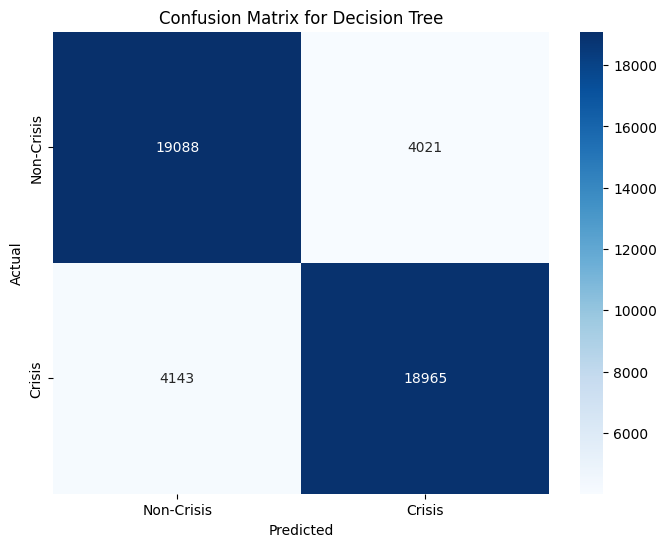

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier()

# Define parameter grid for hyperparameter tuning
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
}

# Perform Grid Search for hyperparameter tuning
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=3, n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train_sample, y_train_sample)

print("Best Decision Tree parameters:", grid_search_dt.best_params_)

# Train final Decision Tree model with the best parameters
final_dt_model = grid_search_dt.best_estimator_
final_dt_model.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred_dt = final_dt_model.predict(X_test_pca)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

# Compute confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plot_confusion_matrix(cm_dt, 'Decision Tree')


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Random Forest parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Accuracy: 0.89090594370037
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89     23109
           1       0.88      0.91      0.89     23108

    accuracy                           0.89     46217
   macro avg       0.89      0.89      0.89     46217
weighted avg       0.89      0.89      0.89     46217



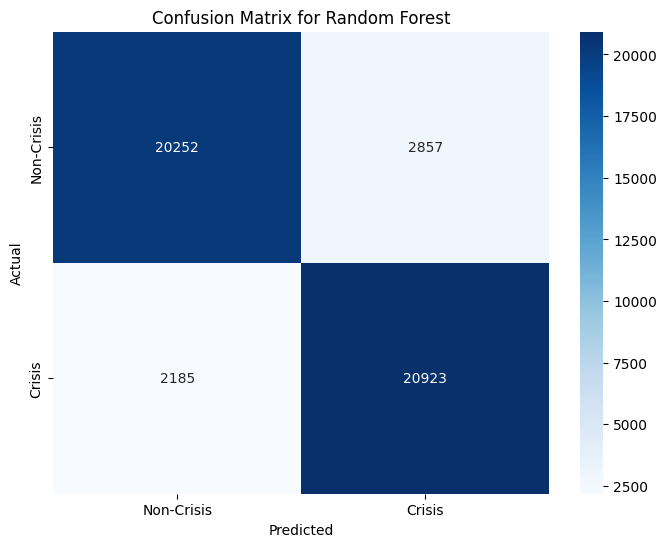

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier()

# Define parameter grid for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
}

# Perform Grid Search for hyperparameter tuning
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train_sample, y_train_sample)

print("Best Random Forest parameters:", grid_search_rf.best_params_)

# Train final Random Forest model with the best parameters
final_rf_model = grid_search_rf.best_estimator_
final_rf_model.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred_rf = final_rf_model.predict(X_test_pca)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(cm_rf, 'Random Forest')


Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best XGBoost parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}
XGBoost Accuracy: 0.903671809074583
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90     23109
           1       0.90      0.91      0.90     23108

    accuracy                           0.90     46217
   macro avg       0.90      0.90      0.90     46217
weighted avg       0.90      0.90      0.90     46217



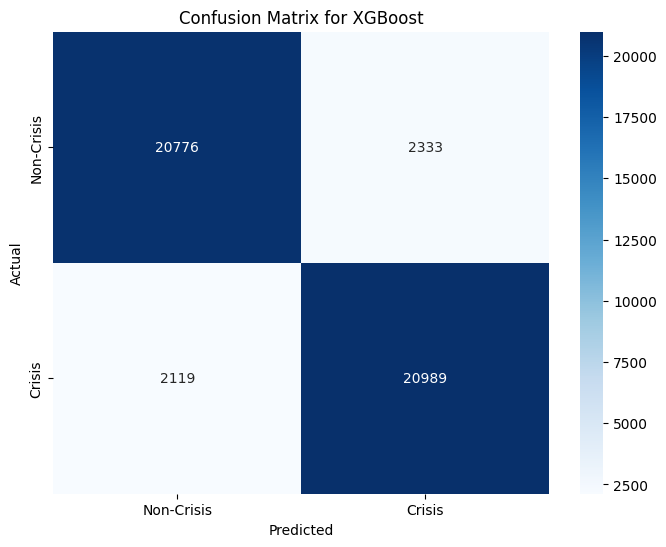

In [ ]:
from xgboost import XGBClassifier

# Initialize XGBoost model
xgb_model = XGBClassifier()

# Define parameter grid for hyperparameter tuning
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150],
}

# Perform Grid Search for hyperparameter tuning
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=3, n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train_sample_pca, y_train_sample)

print("Best XGBoost parameters:", grid_search_xgb.best_params_)

# Train final XGBoost model with the best parameters
final_xgb_model = grid_search_xgb.best_estimator_
final_xgb_model.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred_xgb = final_xgb_model.predict(X_test_pca)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Compute confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plot_confusion_matrix(cm_xgb, 'XGBoost')


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost model
ada_model = AdaBoostClassifier()

# Define parameter grid for hyperparameter tuning
param_grid_ada = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2, 1],
}

# Perform Grid Search for hyperparameter tuning
grid_search_ada = GridSearchCV(ada_model, param_grid_ada, cv=3, n_jobs=-1, verbose=1)
grid_search_ada.fit(X_train_sample, y_train_sample)

print("Best AdaBoost parameters:", grid_search_ada.best_params_)

# Train final AdaBoost model with the best parameters
final_ada_model = grid_search_ada.best_estimator_
final_ada_model.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred_ada = final_ada_model.predict(X_test_pca)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("AdaBoost Classification Report:\n", classification_report(y_test, y_pred_ada))

# Compute confusion matrix
cm_ada = confusion_matrix(y_test, y_pred_ada)
plot_confusion_matrix(cm_ada, 'AdaBoost')


Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best AdaBoost parameters: {'learning_rate': 1, 'n_estimators': 150}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model
knn_model = KNeighborsClassifier()

# Define parameter grid for hyperparameter tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}

# Perform Grid Search for hyperparameter tuning
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=3, n_jobs=-1, verbose=1)
grid_search_knn.fit(X_train_sample, y_train_sample)

print("Best KNN parameters:", grid_search_knn.best_params_)

# Train final KNN model with the best parameters
final_knn_model = grid_search_knn.best_estimator_
final_knn_model.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred_knn = final_knn_model.predict(X_test_pca)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

# Compute confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plot_confusion_matrix(cm_knn, 'KNN')


In [ ]:
from sklearn.svm import SVC

# Initialize SVM model
svm_model = SVC()

# Define parameter grid for hyperparameter tuning
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}

# Perform Grid Search for hyperparameter tuning
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=3, n_jobs=-1, verbose=1)
grid_search_svm.fit(X_train_sample_pca, y_train_sample)

print("Best SVM parameters:", grid_search_svm.best_params_)

# Train final SVM model with the best parameters
final_svm_model = grid_search_svm.best_estimator_
final_svm_model.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred_svm = final_svm_model.predict(X_test_pca)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Compute confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(cm_svm, 'SVM')


In [ ]:
from sklearn.neural_network import MLPClassifier

# Initialize MLP model
mlp_model = MLPClassifier(max_iter=100)

# Define parameter grid for hyperparameter tuning
param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (200,), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Perform Grid Search for hyperparameter tuning
grid_search_mlp = GridSearchCV(mlp_model, param_grid_mlp, cv=3, n_jobs=-1, verbose=1)
grid_search_mlp.fit(X_train_sample_pca, y_train_sample)

print("Best MLP parameters:", grid_search_mlp.best_params_)

# Train final MLP model with the best parameters
final_mlp_model = grid_search_mlp.best_estimator_
final_mlp_model.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred_mlp = final_mlp_model.predict(X_test_pca)
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp))

# Compute confusion matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plot_confusion_matrix(cm_mlp, 'MLP')


In [ ]:
best_params_mlp = {
    'hidden_layer_sizes': (100,),  # Single hidden layer with 100 neurons
    'activation': 'relu',          # ReLU activation function
    'solver': 'adam',              # Adam optimizer
    'alpha': 0.001,               # Regularization parameter
    'learning_rate': 'adaptive',   # Adaptive learning rate
    'max_iter': 10,                # 10 iterations
    'early_stopping': True,        # Enable early stopping
    'validation_fraction': 0.1,    # Fraction of training data for validation
    'n_iter_no_change': 3          # Stop after 3 iterations with no improvement
}

In [ ]:
from sklearn.neural_network import MLPClassifier
# Initialize MLP model with best hyperparameters
mlp_model = MLPClassifier(**best_params_mlp)

# Train the model
mlp_model.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred_mlp = mlp_model.predict(X_test_pca)
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp))

# Compute confusion matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - MLP")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

X_train_small = X_train_pca[:50000]
y_train_small = y_train[:50000]
X_test_small = X_test_pca[:20000]
y_test_small = y_test[:20000]

# Convert sparse matrix (if it's in sparse format) to dense matrix
X_train_dense = X_train_small.toarray()  # Convert sparse to dense
X_test_dense = X_test_small.toarray()    # Convert sparse to dense

# Reshape the input data into a 2D image format (50x100) for CNN
X_train_cnn = X_train_dense.reshape(-1, 50, 100, 1)  # Reshaping to (None, 50, 100, 1)
X_test_cnn = X_test_dense.reshape(-1, 50, 100, 1)

# Best CNN hyperparameters
best_params_cnn = {
    'filters': [32, 64],
    'kernel_size': (3, 3),
    'activation': 'relu',
    'pool_size': (2, 2),
    'optimizer': 'adam',
    'batch_size': 32,
    'epochs': 10
}

# Define the CNN model
cnn_model = Sequential([
    Conv2D(best_params_cnn['filters'][0], best_params_cnn['kernel_size'], activation=best_params_cnn['activation'], input_shape=(50, 100, 1)),
    MaxPooling2D(pool_size=best_params_cnn['pool_size']),
    Conv2D(best_params_cnn['filters'][1], best_params_cnn['kernel_size'], activation=best_params_cnn['activation']),
    MaxPooling2D(pool_size=best_params_cnn['pool_size']),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Assuming 10 classes for classification
])

# Compile the model
cnn_model.compile(optimizer=best_params_cnn['optimizer'], loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model with early stopping
history_cnn = cnn_model.fit(X_train_cnn, y_train_small, epochs=best_params_cnn['epochs'], batch_size=best_params_cnn['batch_size'],
                            validation_data=(X_test_cnn, y_test_small), callbacks=[early_stopping])


In [ ]:
# Evaluate the model
cnn_loss, cnn_acc = cnn_model.evaluate(X_test_cnn, y_test_small)
print("CNN Accuracy:", cnn_acc)

# Predict and compute confusion matrix
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_cnn = tf.argmax(y_pred_cnn, axis=1)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_cnn = confusion_matrix(y_test_small, y_pred_cnn)
plot_confusion_matrix(cm_cnn, 'CNN')